# Plant Disease Prediction

## Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 21043 files belonging to 10 classes.


2024-07-29 01:09:30.761997: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-07-29 01:09:30.762035: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-07-29 01:09:30.762045: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-07-29 01:09:30.762070: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-29 01:09:30.762083: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 5460 files belonging to 10 classes.


## Building Model

#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

In [4]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [5]:
cnn.add(tf.keras.layers.Input(shape=[128, 128, 3]))

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [12]:
cnn.add(tf.keras.layers.Flatten())

In [13]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [14]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [15]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))

### Compiling and Training Phase

In [16]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        15,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,800,734 (29.76 MB)

 Trainable params: 7,800,734 (29.76 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
with tf.device('/GPU:0'):
    training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=50)

Epoch 1/50


2024-07-29 01:09:41.326879: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


658/658 ━━━━━━━━━━━━━━━━━━━━ 79s 117ms/step - accuracy: 0.3886 - loss: 1.6934 - val_accuracy: 0.8049 - val_loss: 0.5441
Epoch 2/50
658/658 ━━━━━━━━━━━━━━━━━━━━ 75s 114ms/step - accuracy: 0.8025 - loss: 0.5740 - val_accuracy: 0.8962 - val_loss: 0.3244
Epoch 3/50
658/658 ━━━━━━━━━━━━━━━━━━━━ 80s 122ms/step - accuracy: 0.8695 - loss: 0.3743 - val_accuracy: 0.9071 - val_loss: 0.2718
Epoch 4/50
658/658 ━━━━━━━━━━━━━━━━━━━━ 96s 146ms/step - accuracy: 0.9081 - loss: 0.2782 - val_accuracy: 0.9266 - val_loss: 0.2115
Epoch 5/50
658/658 ━━━━━━━━━━━━━━━━━━━━ 119s 181ms/step - accuracy: 0.9350 - loss: 0.1851 - val_accuracy: 0.9332 - val_loss: 0.2039
Epoch 6/50
658/658 ━━━━━━━━━━━━━━━━━━━━ 119s 181ms/step - accuracy: 0.9446 - loss: 0.1580 - val_accuracy: 0.9363 - val_loss: 0.1822
Epoch 7/50
658/658 ━━━━━━━━━━━━━━━━━━━━ 120s 182ms/step - accuracy: 0.9593 - loss: 0.1204 - val_accuracy: 0.9471 - val_loss: 0.1691
Epoch 8/50
658/658 ━━━━━━━━━━━━━━━━━━━━ 124s 189ms/step - accuracy: 0.9664 - loss: 0.1016 -

## Evaluating Model

In [20]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

658/658 ━━━━━━━━━━━━━━━━━━━━ 30s 46ms/step - accuracy: 0.9967 - loss: 0.0132
Training accuracy: 0.9970536231994629


In [21]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

171/171 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.9682 - loss: 0.1092
Validation accuracy: 0.9714285731315613


### Saving Model

In [22]:
# Save as HDF5
cnn.save('trained_tomato_disease_model.h5')

In [23]:
# Save as TensorFlow SavedModel
cnn.save('trained_tomato_disease_model.keras')

In [24]:
training_history.history #Return Dictionary of history

{'accuracy': [0.5733973383903503,
  0.8269258141517639,
  0.8840944766998291,
  0.9157914519309998,
  0.9403126835823059,
  0.9491992592811584,
  0.9601292610168457,
  0.9669248461723328,
  0.9709641933441162,
  0.9743857979774475,
  0.977759838104248,
  0.9797557592391968,
  0.9836050271987915,
  0.9817516803741455,
  0.9858385324478149,
  0.9865988492965698,
  0.9863612651824951,
  0.9887373447418213,
  0.9860286116600037,
  0.9897828102111816,
  0.9891175031661987,
  0.9912559986114502,
  0.9894501566886902,
  0.9899253845214844,
  0.9924440383911133,
  0.9914935827255249,
  0.9916361570358276,
  0.9924915432929993,
  0.9919213056564331,
  0.992634117603302,
  0.994392454624176,
  0.9903531074523926,
  0.9927291870117188,
  0.9929667711257935,
  0.9971486926078796,
  0.9931568503379822,
  0.9919213056564331,
  0.9941073060035706,
  0.9947251081466675,
  0.9919213056564331,
  0.9958655834197998,
  0.9948201179504395,
  0.9950101971626282,
  0.9957705736160278,
  0.9937746524810791,
 

In [25]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [26]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

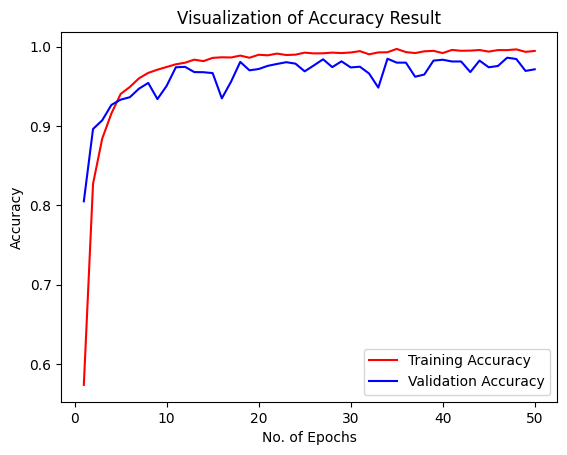

In [28]:
epochs = range(1, len(training_history.history['accuracy']) + 1)

# Plot training and validation accuracy
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [29]:
class_name = validation_set.class_names

In [30]:
class_name

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [31]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 5460 files belonging to 10 classes.


In [32]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

5460/5460 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step


In [35]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

2024-07-29 02:52:46.517358: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [36]:
Y_true

<tf.Tensor: shape=(5460,), dtype=int64, numpy=array([0, 0, 0, ..., 9, 9, 9])>

In [37]:
predicted_categories

<tf.Tensor: shape=(5460,), dtype=int64, numpy=array([0, 0, 0, ..., 9, 9, 9])>

In [38]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [39]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.99      0.99      0.99       501
                        Tomato___Early_blight       0.95      0.96      0.95       570
                         Tomato___Late_blight       0.97      0.96      0.96       548
                           Tomato___Leaf_Mold       0.97      0.99      0.98       557
                  Tomato___Septoria_leaf_spot       0.98      0.92      0.95       518
Tomato___Spider_mites Two-spotted_spider_mite       0.97      0.96      0.96       521
                         Tomato___Target_Spot       0.94      0.97      0.95       543
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.99      0.99      0.99       590
                 Tomato___Tomato_mosaic_virus       0.98      0.99      0.99       546
                             Tomato___healthy       0.98      0.98      0.98       566

                                     accu

## Confusion Matrix Visualization

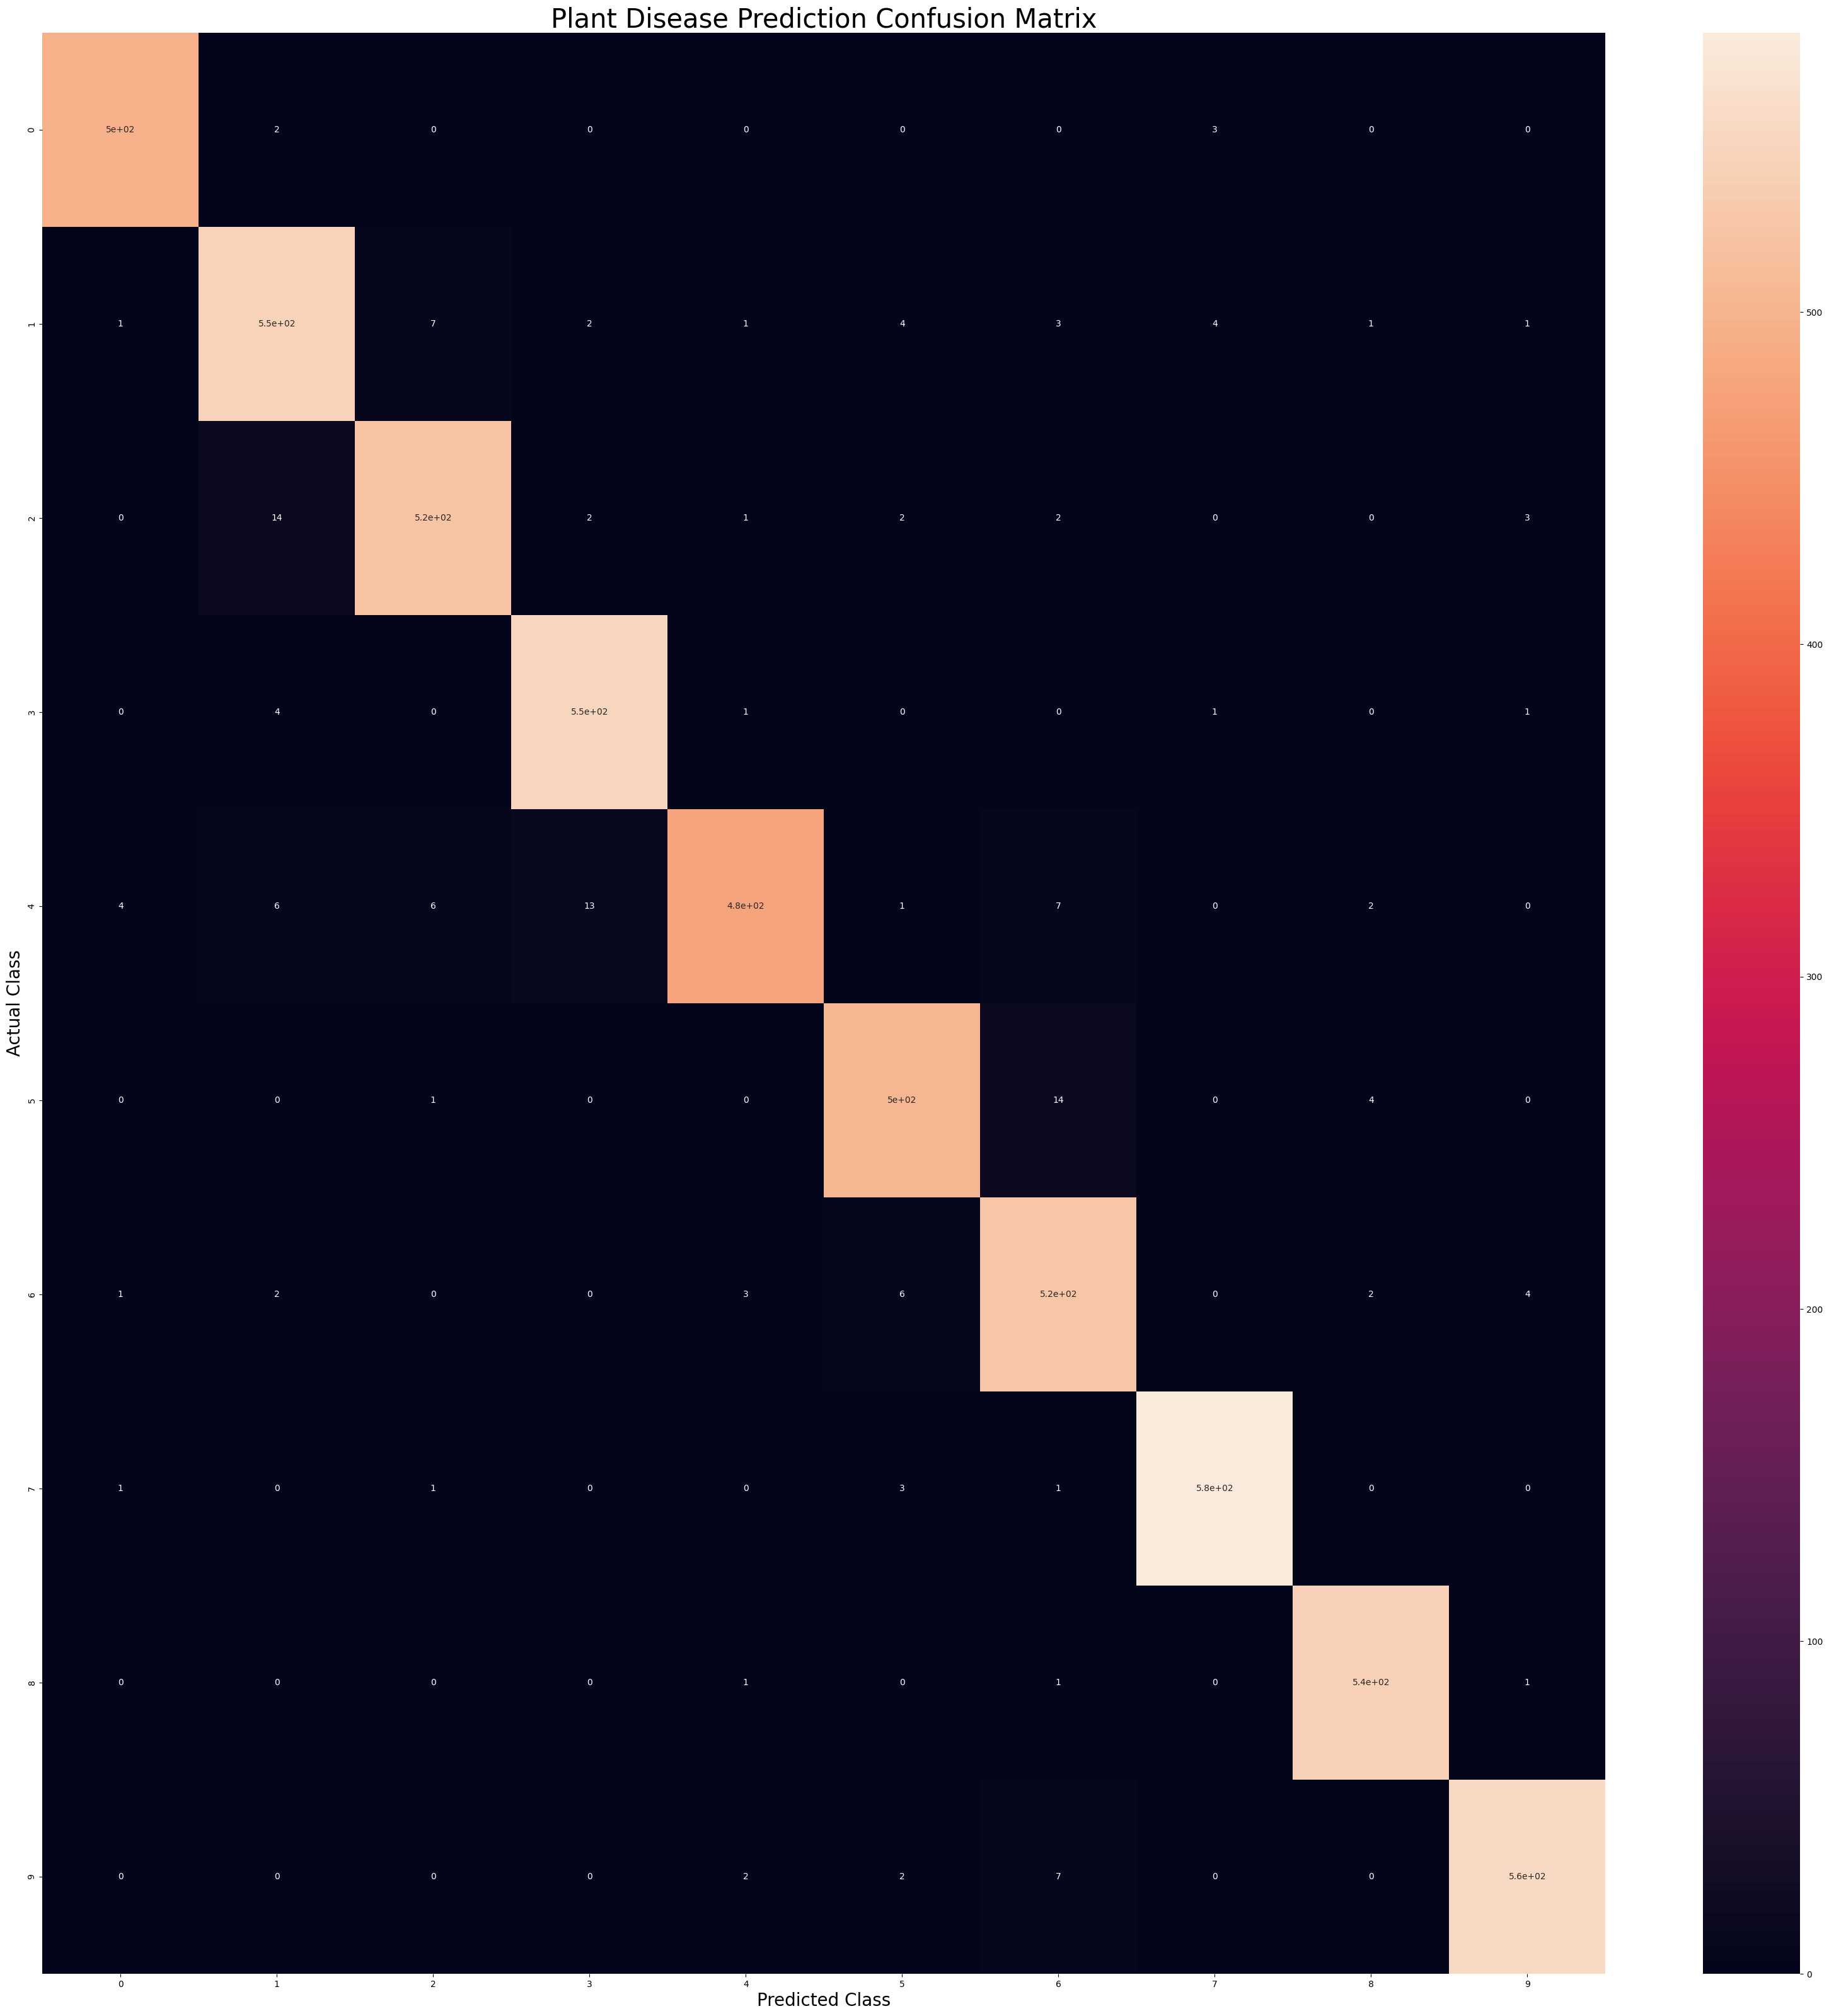

In [40]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 30)
plt.show()